In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Import the data
datafile = "data/healthcare-dataset-stroke-data.csv"

# Load the data
df = pd.read_csv(datafile)

# Preprocess the data
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df["Residence_type"] = df["Residence_type"].map({'Urban': 1, 'Rural': 0})
df['stroke'] = df['stroke'].astype('category').cat.codes

# Drop rows with NaN values
df = df.dropna()

# Convert columns to categorical using one-hot encoding
df = pd.get_dummies(df, columns=['smoking_status', "work_type", "Residence_type", "ever_married"])

# Define features and target again after encoding
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

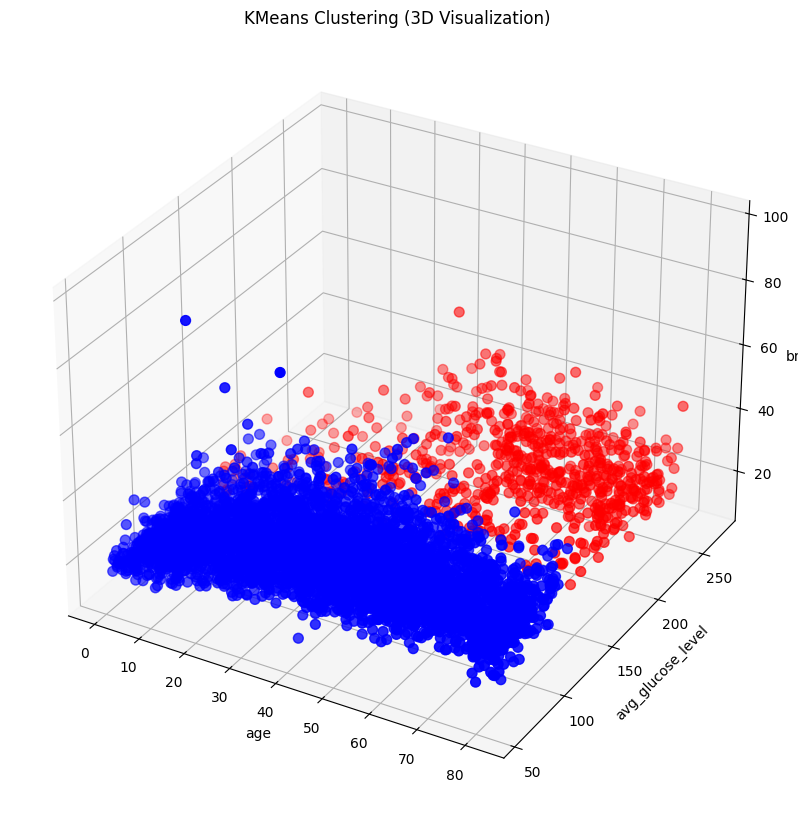

In [7]:
# Importar librerías necesarias
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Realizar el clustering con KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Añadir las etiquetas de los clusters al DataFrame
df['cluster'] = kmeans.labels_

# Visualización en 3D
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Seleccionar tres características para la visualización
x_feature = 'age'
y_feature = 'avg_glucose_level'
z_feature = 'bmi'

# Asignar colores a los clusters
colors = {0: 'blue', 1: 'red'}

# Graficar los puntos
ax.scatter(df[x_feature], df[y_feature], df[z_feature], c=df['cluster'].map(colors), s=50)

# Etiquetas de los ejes
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)

# Título del gráfico
ax.set_title('KMeans Clustering (3D Visualization)')

plt.show()